In [83]:
from graphviz import Digraph
from micrograd.engine import Value

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    nodes, edges = trace(root)
    dot = Digraph(format="svg", graph_attr={'rankdir': 'LR'}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f }" % (n.data,), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [84]:
class Value:
    def __init__(self, data, _children=(), op=""):
        self.data = data
        self._prev = set(_children)
        self._op = op
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        return Value(self.data + other.data, (self,other), "+")
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self,other), "*")

In [85]:
a= Value(20)
b = Value(5)
c= Value(10)

d = a+b*c
d

Value(data=70)

In [86]:
d._op

'+'

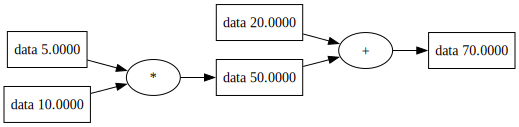

In [87]:
draw_dot(d)